### 查看系统版本

In [84]:
import sys
print(sys.version)
print(sys.executable)

3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
C:\ProgramData\Anaconda3\python.exe


### 查看四个属性的值与对应的价格分布情况

In [85]:
from pandas import read_csv
import matplotlib.pyplot as plt
import math

def showRelate(load):
    # 加载数据
    dataset =read_csv(load).values
    X = dataset[:,0:4]  # 【每一行三个属性的值：[  1.      6.575   1.    296.   ]】 
    Y = dataset[:,4] # 【每一行价格的值：[24.  21.6   ...]】

    #(特征工程)
    features = [] # 【五个属性名：'ID', 'RM', 'RAD', 'TAX', 'PRICE'】
    for i in read_csv(load).keys():
        features.append(i)

    nums = len(features) - 1 
    columns = 4 # 四个属性

    rows = math.ceil(nums /columns)  # 向上取整数：1.1 -> 2
    plt.figure(figsize=(12,10))

    tags = ['r+', 'g*', "b^", "y+"] # 点形状颜色

    for i in range(nums):
        plt.subplot(rows, columns, i + 1)
        plt.plot(X[:, i], Y, tags[i])
        plt.title(features[i])

    plt.show()


### 定义处理四个属性特征、标准化测试集数据、预测测试集的PRICE以及预测结果保存的函数

In [86]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_regression
from matplotlib import pyplot as plt


#字典结果：{提取k个最佳特征，及索引}
def ToBeStdAndSel(X,Y,k):
    stand = StandardScaler()
    X_std = stand.fit_transform(X)
    best = SelectKBest(f_regression, k=k)
    X_best = best.fit_transform(X_std, Y)#A
    best_index = best.get_support()#B AB顺序不能换
    BEST = {}
    BEST['best_index'] = best_index  # [true, true, true, true]
    BEST['X_best'] = X_best # 等价于 X_std[:,best_index]
    return BEST

#标准化
def ToBeStd(X):
    stand = StandardScaler()
    X_std = stand.fit_transform(X)
    return X_std

# 保存csv
def ToSaveCsv(y_pred):
    res = pd.DataFrame()
    features = ['ID', 'RM', 'RAD', 'TAX', 'PRICE']
    for i in range(len(features) - 1):
        res[features[i]] = test_set[:, i]
    res['PRICE'] = [round(y) for y in y_pred]
    res.to_csv('data/secondData/res.csv', index=False) # mode 追加，index 添加自增序号列，
    print("===================预测的PRICE已保存在【 res.csv 】===========================")

#预测
def TryToPredict(testset):
    x_pred = testset[:, 0:4]
    x_pred_best = ToBeStd(x_pred)[:, best_index]
    y_pred = lr.predict(x_pred_best)
    return y_pred

### 训练train_dayaset.csv数据，并且生成测试训练集得到的PRICE与真实PRICE的对比图

==================【 训练集误差为：39.6 】==================


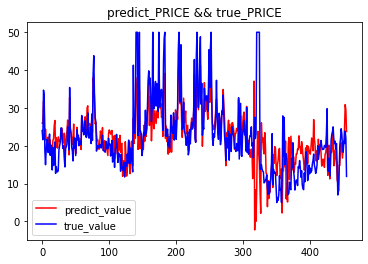

===================预测的PRICE已保存在【 res.csv 】===========================


In [87]:
# 加载训练集数据
dataset =read_csv('data/secondData/train_dataset.csv').values
X_train = dataset[:,0:4]  # 【每一行三个属性的值：[  1.      6.575   1.    296.   ]】 
Y_train = dataset[:,4] # 【每一行价格的值：[24.  21.6   ...]】

BEST = ToBeStdAndSel(X_train, Y_train, 4 ) # 处理四个属性特征
X_train_best = BEST['X_best'] 
best_index = BEST['best_index']

# 创建线性回归模型
lr = LinearRegression()
# 拟合训练数据
lr.fit(X_train_best, Y_train) # 训练模型

# 得到预测结果 y
y_train_pred = lr.predict(X_train_best)

# 计算评测指标
error_train = mean_squared_error(Y_train, y_train_pred)
print("==================【 训练集误差为：{:.1f} 】==================".format(error_train))

plt.plot(y_train_pred, 'r-', label = 'predict_value')
plt.plot(Y_train,'b-', label = 'true_value')
plt.title('predict_PRICE && true_PRICE')
plt.legend()
plt.show()

#预测、保存
test_set =read_csv('data/secondData/test_dataset.csv').values
y_pred = TryToPredict(test_set) # 获取预测值
ToSaveCsv(y_pred) # 写入 res.csv 文件


### 查看Train集下【四个属性的值与对应的价格分布图】
### 查看test集下【四个属性的值与对应的价格分布图】

===========================Train集下【四个属性的值与对应的价格分布图如下】====================


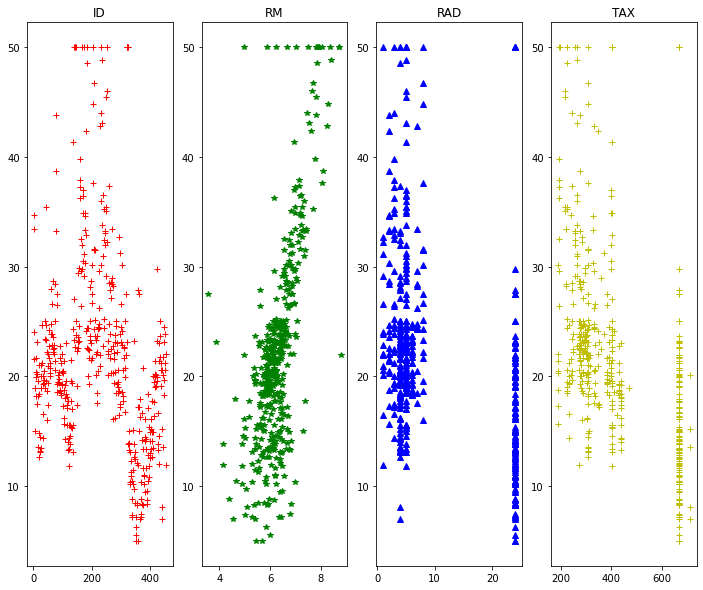

===========================test集下【四个属性的值与对应的价格分布图如下】====================


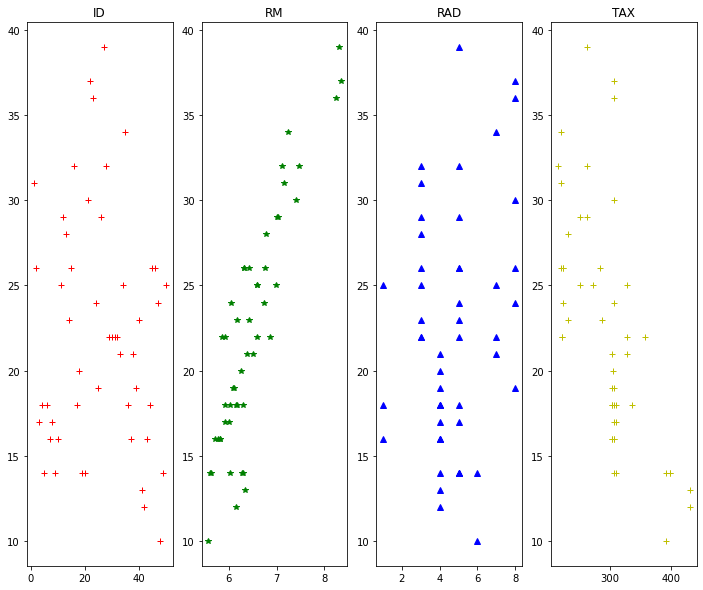

In [88]:
train_load = 'data/secondData/train_dataset.csv'
test_load = 'data/secondData/res.csv'

print('===========================Train集下【四个属性的值与对应的价格分布图如下】====================')
showRelate(train_load)

print('===========================test集下【四个属性的值与对应的价格分布图如下】====================')
showRelate(test_load)